In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from utility import *
from hmmlearn import hmm
import seaborn as sns
import pickle
import matplotlib.cm as cm
import networkx as nx
import ipywidgets as widgets
from IPython.display import display, HTML
import imp
%matplotlib inline

modelFolder='/Users/yyu/Documents/Psychology/insight/EEG_data/results/model/'
dataFolder='/Users/yyu/Documents/Psychology/insight/EEG_data/processed/cra/'

In [2]:
featureList=["{:.1f},{:.1f}".format(c,f) for c in includeSources for f in includeFreqs]
len(featureList)

152

In [3]:
len(includeSources)

19

In [4]:
#with initialization
with open(modelFolder+'13_full_2_iter_30.pkl', "rb") as file: 
    model=pickle.load(file)
np.round(model.monitor_.history)

array([-1.91284986e+08, -1.91270766e+08])

In [5]:
nstate = np.shape(model.means_)[0]

In [6]:
#reordered index name
statelabel=['10','6','2','1','11','5','9','8','13','4','7','12','3']

In [7]:
states=range(nstate)
allstate=pd.DataFrame()
toOnset_pt=np.linspace(-1,14,15*20+1)

for subid in os.listdir(dataFolder):
    if not os.path.isdir(dataFolder+subid):continue
    for f in os.listdir(dataFolder+subid):
        if f.split('.')[1]!='csv':continue
        style = f.split('.')[0].split('_')[2]
        n=f.split('.')[0].split('_')[3]
        tmp = pd.read_csv(dataFolder+subid +'/'+ f, index_col=None)
       
        #dont need "n" because only one trial in a file
        state_prob=model.predict_proba(tmp[featureList])
        #stateDf=pd.concat([pd.DataFrame(state_prob,columns=states),tmp[featureList]],axis=1)
        stateDf=pd.DataFrame(state_prob,columns=states)
       
        stateDf['to_Onset']=tmp['timeToStim']
        duration=tmp['timeToStim'].loc[0]-tmp['timeToResp'].loc[0]
        minT=stateDf['to_Onset'].min()
        maxT=stateDf['to_Onset'].max()
        stateDf.set_index('to_Onset',inplace=True)
        resample_pt=toOnset_pt[(toOnset_pt<=maxT)&(toOnset_pt>=minT)]
        stateDf = stateDf.reindex(stateDf.index.union(resample_pt).astype(float)).interpolate(method='cubic').loc[resample_pt]
        stateDf=stateDf.reset_index().rename(columns={'index':'to_Onset'})
        stateDf['style']=style
        stateDf['subid']=subid
        stateDf['to_Last']=stateDf['to_Onset']-np.round(np.round(duration*20)/20,2)
        stateDf['n']=int(n)
        stateDf['state']=stateDf[states].idxmax(axis=1)
        allstate=pd.concat([allstate,stateDf])
allstate['id']=allstate.apply(lambda r: (r['subid'],r['style'],r['n']), axis=1)
allstate['to_Last']=np.round(allstate['to_Last'],2)

# Analysis

In [7]:

allstateDF={'ANA':allstate[(allstate['style']=='ANA')],
            'INS':allstate[(allstate['style']=='INS')],
            'TO':allstate[allstate['style']=='TO']}

In [31]:
sns.set(font_scale = 1.5)
sns.set_style("white")

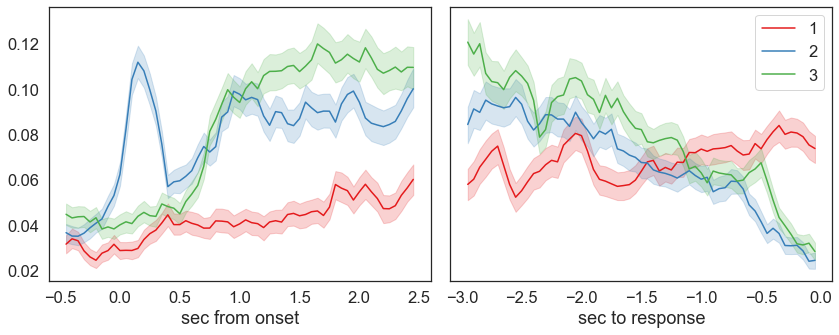

In [43]:
sns.set_palette(sns.color_palette(palette='Set1'))

tmp=allstate[~(allstate['style']=='TO')]
fig,ax=plt.subplots(1,2,figsize=(12,5),sharey=True)
legendlabel=[]

for i in [3,2,12]:
    sns.lineplot(data=tmp[(tmp['to_Onset']>-.5)&(tmp['to_Onset']<2.5)&(tmp['to_Last']<-2)],
                x='to_Onset',y=i,ci=68,ax=ax[0])
    legendlabel.append(statelabel[i])

ax[0].set_xlabel('sec from onset')
ax[0].set_ylabel('')
for i in [3,2,12]:
    sns.lineplot(data=tmp[(tmp['to_Last']<0)&(tmp['to_Onset']>2)&(tmp['to_Last']>-3)],
                x='to_Last',y=i,ci=68,ax=ax[1])
ax[1].legend(labels=[1,2,3])
ax[1].set_xlabel('sec to response')
ax[1].set_ylabel('')
plt.tight_layout()
plt.show()
plt.close()


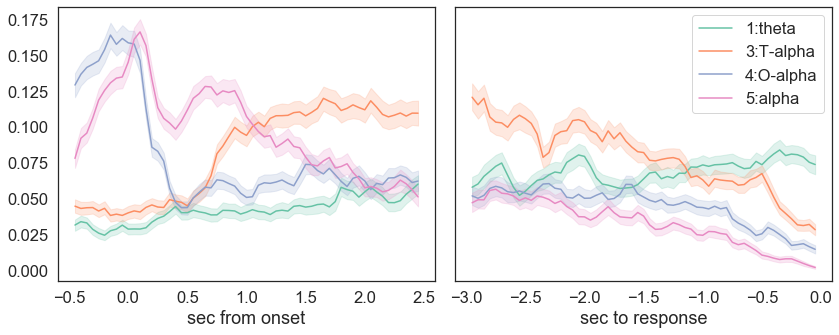

In [54]:
sns.set_palette(sns.color_palette(palette='Set2'))
tmp=allstate[~(allstate['style']=='TO')]
fig,ax=plt.subplots(1,2,figsize=(12,5),sharey=True)
legendlabel=[]

for i in [3,12,9,5]:
    sns.lineplot(data=tmp[(tmp['to_Onset']>-.5)&(tmp['to_Onset']<2.5)&(tmp['to_Last']<-2)],
                x='to_Onset',y=i,ci=68,ax=ax[0])
    legendlabel.append(statelabel[i])

ax[0].set_xlabel('sec from onset')
ax[0].set_ylabel('')
for i in [3,12,9,5]:
    sns.lineplot(data=tmp[(tmp['to_Last']<0)&(tmp['to_Onset']>2)&(tmp['to_Last']>-3)],
                x='to_Last',y=i,ci=68,ax=ax[1])
ax[1].legend(labels=['1:theta','3:T-alpha','4:O-alpha','5:alpha'])
ax[1].set_xlabel('sec to response')
ax[1].set_ylabel('')
plt.tight_layout()
plt.show()
plt.close()


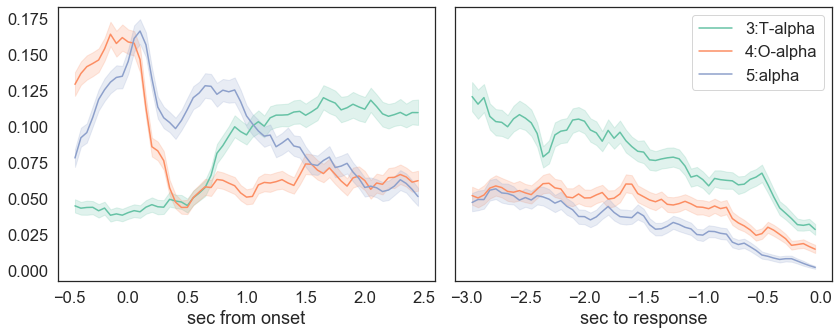

In [22]:
sns.set_palette(sns.color_palette(palette='Set2'))
tmp=allstate[~(allstate['style']=='TO')]
fig,ax=plt.subplots(1,2,figsize=(12,5),sharey=True)
legendlabel=[]

for i in [12,9,5]:
    sns.lineplot(data=tmp[(tmp['to_Onset']>-.5)&(tmp['to_Onset']<2.5)&(tmp['to_Last']<-2)],
                x='to_Onset',y=i,ci=68,ax=ax[0])
    legendlabel.append(statelabel[i])

ax[0].set_xlabel('sec from onset')
ax[0].set_ylabel('')
for i in [12,9,5]:
    sns.lineplot(data=tmp[(tmp['to_Last']<0)&(tmp['to_Onset']>2)&(tmp['to_Last']>-3)],
                x='to_Last',y=i,ci=68,ax=ax[1])
ax[1].legend(labels=['3:T-alpha','4:O-alpha','5:alpha'])
ax[1].set_xlabel('sec to response')
ax[1].set_ylabel('')
plt.tight_layout()
plt.show()
plt.close()

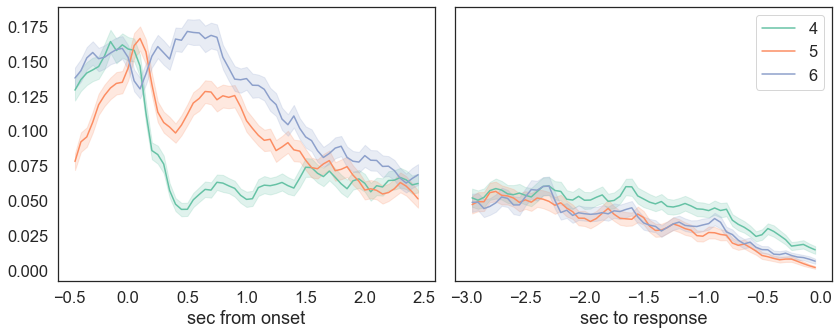

In [45]:
sns.set_palette(sns.color_palette(palette='Set2'))
tmp=allstate[~(allstate['style']=='TO')]
fig,ax=plt.subplots(1,2,figsize=(12,5),sharey=True)
legendlabel=[]

for i in [9,5,1]:
    sns.lineplot(data=tmp[(tmp['to_Onset']>-.5)&(tmp['to_Onset']<2.5)&(tmp['to_Last']<-2)],
                x='to_Onset',y=i,ci=68,ax=ax[0])
    legendlabel.append(statelabel[i])

ax[0].set_xlabel('sec from onset')
ax[0].set_ylabel('')
for i in [9,5,1]:
    sns.lineplot(data=tmp[(tmp['to_Last']<0)&(tmp['to_Onset']>2)&(tmp['to_Last']>-3)],
                x='to_Last',y=i,ci=68,ax=ax[1])
ax[1].legend(labels=[4,5,6])
ax[1].set_xlabel('sec to response')
ax[1].set_ylabel('')
plt.tight_layout()
plt.show()
plt.close()


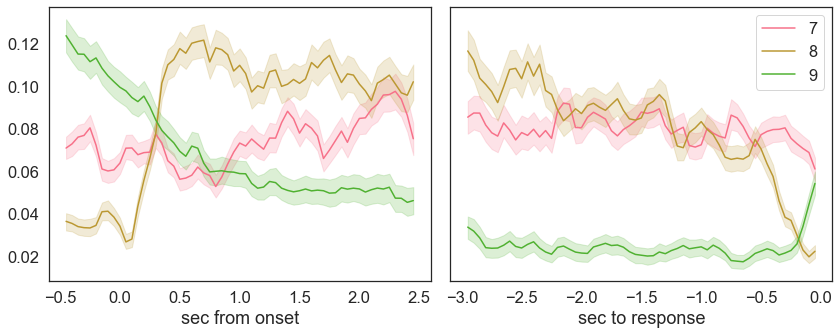

In [12]:
sns.set_palette(sns.color_palette(palette='husl'))
tmp=allstate[~(allstate['style']=='TO')]
fig,ax=plt.subplots(1,2,figsize=(12,5),sharey=True)
legendlabel=[]

for i in [10,7,6]:
    sns.lineplot(data=tmp[(tmp['to_Onset']>-.5)&(tmp['to_Onset']<2.5)&(tmp['to_Last']<-2)],
                x='to_Onset',y=i,ci=68,ax=ax[0])
    legendlabel.append(statelabel[i])

ax[0].set_xlabel('sec from onset')
ax[0].set_ylabel('')
for i in [10,7,6]:
    sns.lineplot(data=tmp[(tmp['to_Last']<0)&(tmp['to_Onset']>2)&(tmp['to_Last']>-3)],
                x='to_Last',y=i,ci=68,ax=ax[1])
ax[1].legend(labels=[7,8,9])
ax[1].set_xlabel('sec to response')
ax[1].set_ylabel('')
plt.tight_layout()
plt.show()
plt.close()

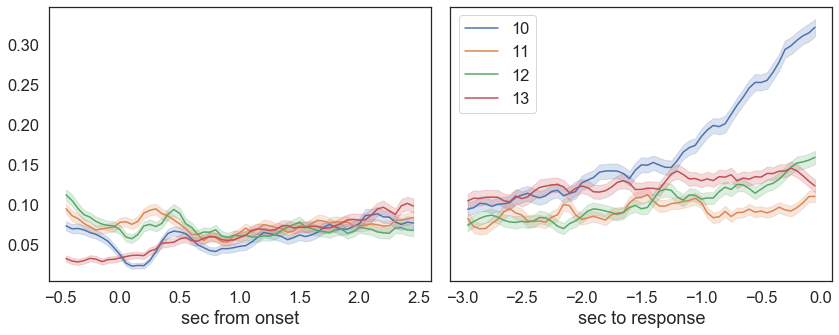

In [21]:
sns.set_palette(sns.color_palette(palette='deep',n_colors=8))
tmp=allstate[~(allstate['style']=='TO')]
fig,ax=plt.subplots(1,2,figsize=(12,5),sharey=True)
legendlabel=[]

for i in [0,4,11,8]:
    sns.lineplot(data=tmp[(tmp['to_Onset']>-.5)&(tmp['to_Onset']<2.5)&(tmp['to_Last']<-2)],
                x='to_Onset',y=i,ci=68,ax=ax[0])
    legendlabel.append(statelabel[i])

ax[0].set_xlabel('sec from onset')
ax[0].set_ylabel('')
for i in [0,4,11,8]:
    sns.lineplot(data=tmp[(tmp['to_Last']<0)&(tmp['to_Onset']>2)&(tmp['to_Last']>-3)],
                x='to_Last',y=i,ci=68,ax=ax[1])
ax[1].legend(labels=[10,11,12,13])
ax[1].set_xlabel('sec to response')
ax[1].set_ylabel('')
plt.tight_layout()
plt.show()
plt.close()

In [29]:
sns.set_palette(sns.color_palette())

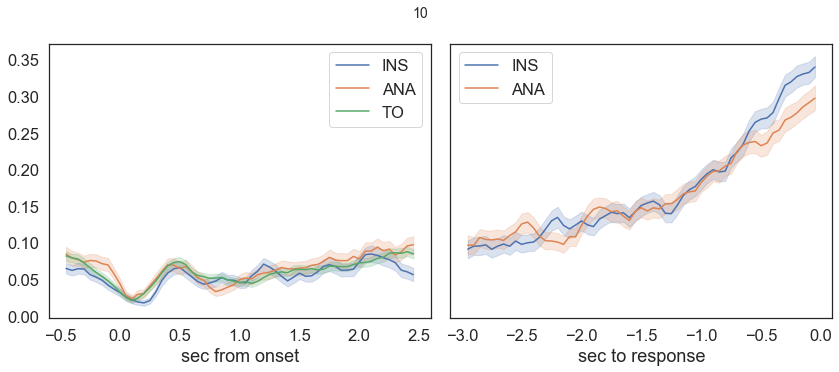

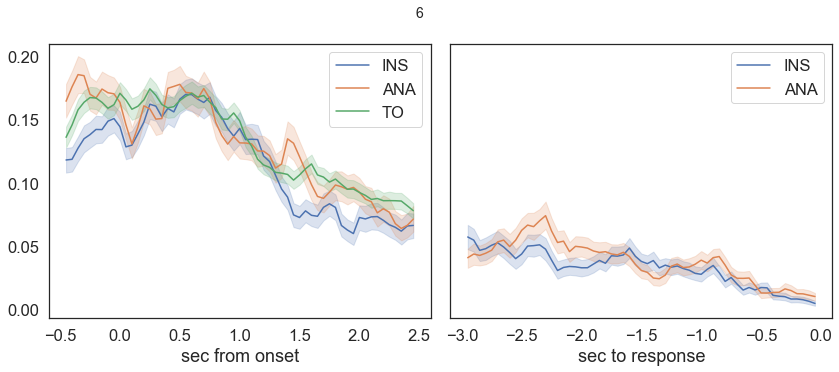

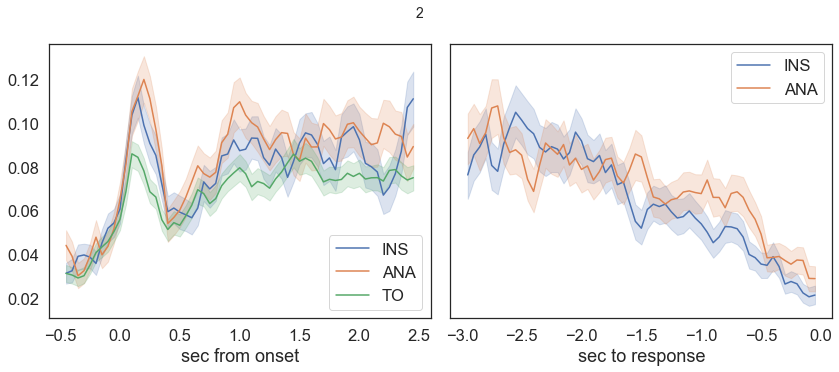

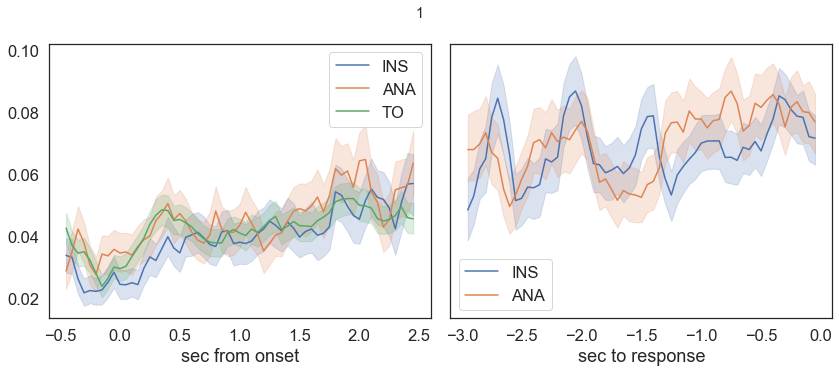

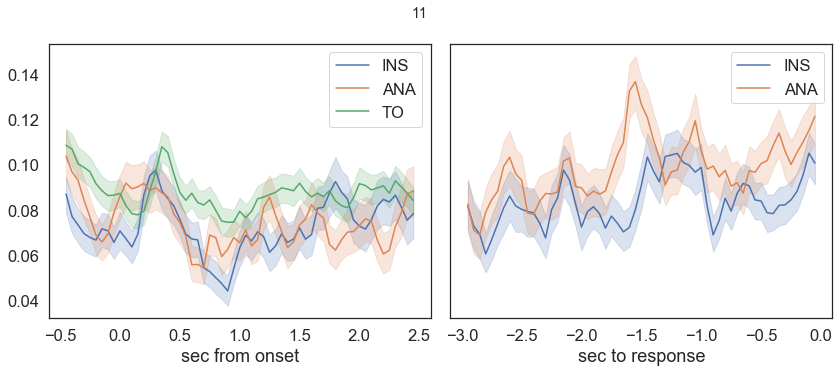

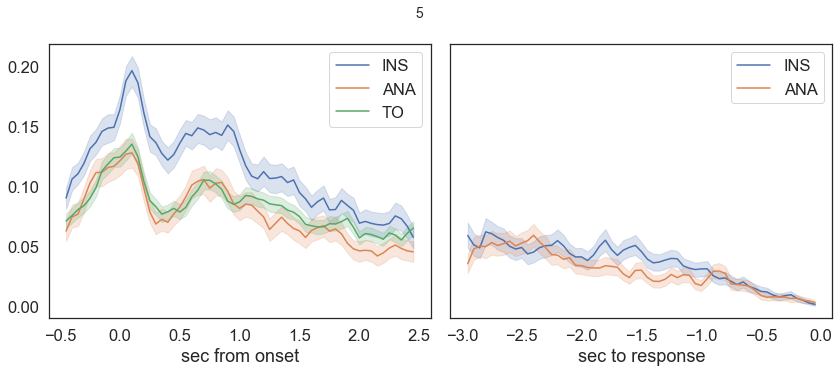

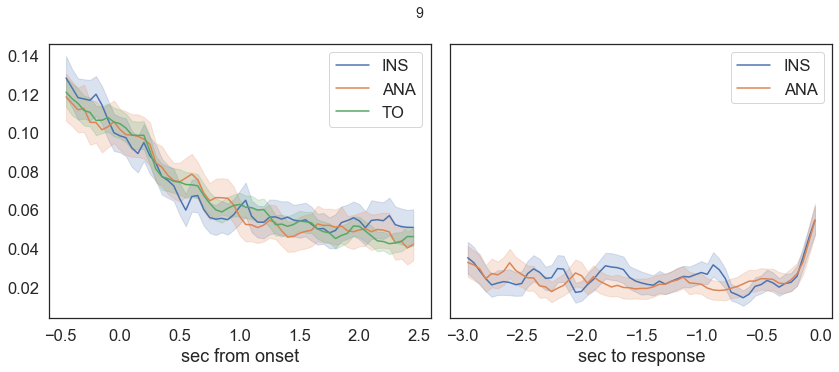

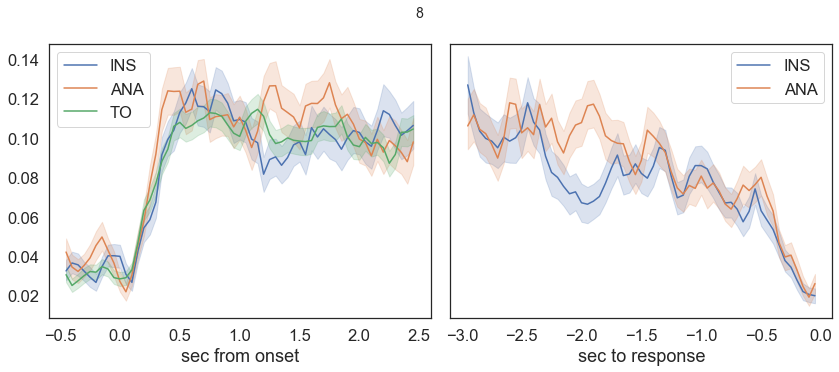

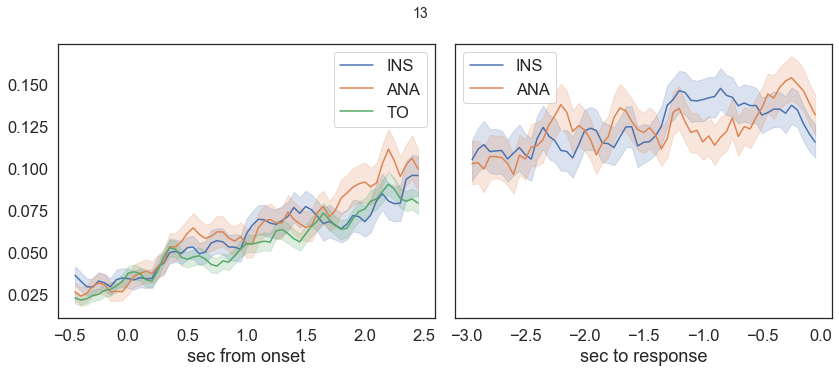

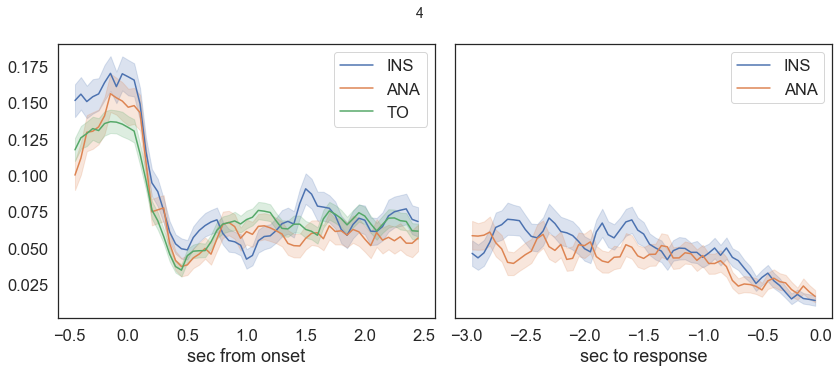

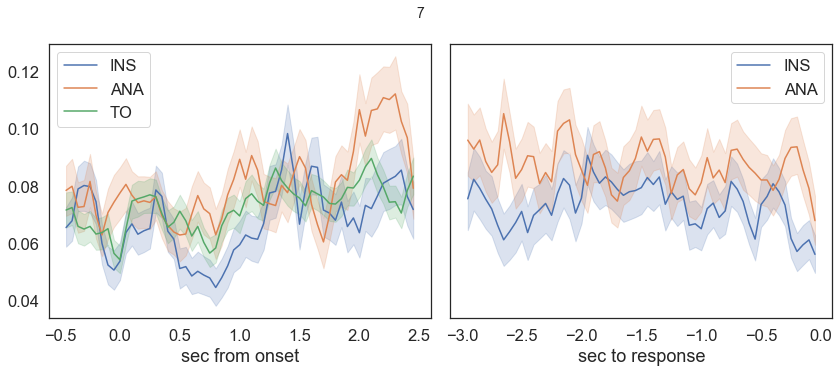

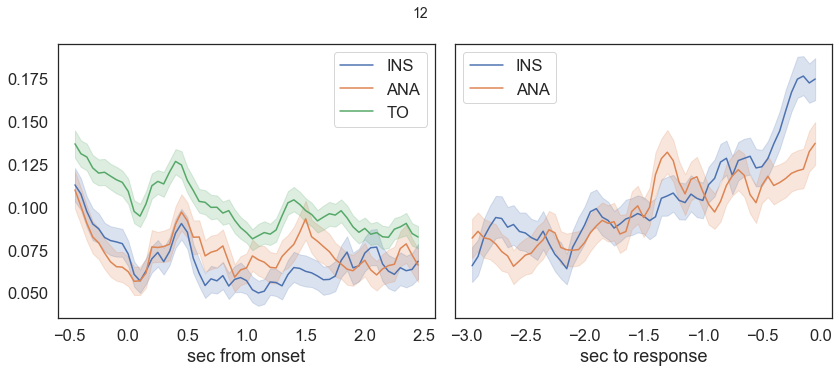

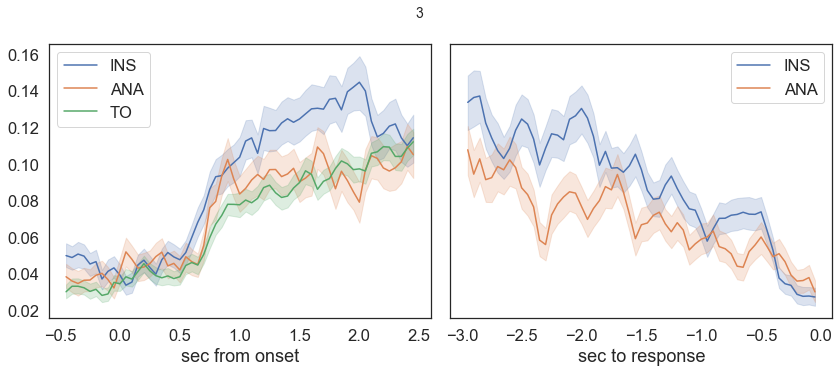

In [37]:
sns.set_palette(sns.color_palette())
for i in range(nstate):
    fig,ax=plt.subplots(1,2,figsize=(12,5),sharey=True)

    for style in ['INS','ANA','TO']:
        sns.lineplot(data=allstateDF[style][(allstateDF[style]['to_Onset']>-0.5)&(allstateDF[style]['to_Onset']<2.5)&
                                                (allstateDF[style]['to_Last']<-2)], 
                         x="to_Onset", y=i,ci=68,ax=ax[0])
    ax[0].legend(labels=['INS','ANA','TO'])
    #ax[0].set_ylim(0.00,0.34)
    #ax[0].set_title(statelabels[i]+' state probability')
    ax[0].set_xlabel('sec from onset')
    ax[0].set_ylabel('')
    for style in ['INS','ANA']:
        sns.lineplot(data=allstateDF[style][(allstateDF[style]['to_Onset']>2)&(allstateDF[style]['to_Last']>-3)&
                                                (allstateDF[style]['to_Last']<0)], 
                         x="to_Last", y=i,ci=68,ax=ax[1])
    ax[1].legend(labels=['INS','ANA'])
    #ax[1].set_title(statelabels[i]+' state probability')
    ax[1].set_xlabel('sec to response')
    ax[1].set_ylabel('')
    plt.tight_layout()
    #ax[1].set_ylim(0.0,0.34)
    plt.suptitle(statelabel[i],y=1.05,size=14)
    
    plt.show()
    plt.close()



In [11]:
solvedall=allstate[allstate['style'].isin(['ANA','INS'])]
solvedall=solvedall[(solvedall['to_Last']<=0)]
stepsize=0.05
onsetms=0
solvedall['statelst']=solvedall['state'].shift(1)
solvedall['change']=~(solvedall['state']==solvedall['statelst'])
solvedall.set_index(['style','id'],inplace=True)
solvedall['chgflag']=(~(solvedall['change']==0)).astype(int)
solvedall['chgflag']=solvedall['chgflag'].cumsum()

In [82]:
datadf=pd.DataFrame()
for i,r in solvedall.groupby(['style','id']):
    r.ix[0,'change']=True
    tmp=r[r['change']][['to_Onset','to_Last','state']+list(states)]
    tmp['dur']=tmp['to_Onset'].diff().shift(-1)
    tmp.sort_values('to_Onset',ascending=False,inplace=True)
    tmp['state2Last']=range(len(tmp))
    try:
        onset_index=tmp[tmp['to_Onset']<0]['state2Last'].values[0]
    except:
        #no transition after onset
        onset_index=-1
    tmp['state2Last']=-1*tmp['state2Last']
    tmp['sinceOnset']=tmp['state2Last']+onset_index
    datadf=pd.concat([datadf,tmp])
datadf.head()

/Users/yyu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/yyu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


to_Onset  to_Last  state             0         1  \
style id                                                                
ANA   (102, ANA, 1)      4.20    -0.90      4 -5.332287e-05  0.000065   
      (102, ANA, 1)      3.95    -1.15      2  6.941773e-04  0.000237   
      (102, ANA, 1)      3.85    -1.25      4 -7.509132e-08  0.000007   
      (102, ANA, 1)      3.70    -1.40      5  1.448523e-02  0.000038   
      (102, ANA, 1)      3.60    -1.50      3  1.355709e-01  0.000024   

                            2         3         4         5             6  \
style id                                                                    
ANA   (102, ANA, 1)  0.128129  0.107094  0.670069  0.094698 -6.385002e-07   
      (102, ANA, 1)  0.622696  0.002554  0.264311  0.109507  9.306097e-07   
      (102, ANA, 1)  0.004337  0.000134  0.561560  0.433961 -2.295895e-08   
      (102, ANA, 1)  0.000268  0.081246  0.389938  0.514155 -1.296643e-04   
      (102, ANA, 1)  0.105492  0.704028  0.009143  0.011190  3.455193e-02   

                      dur  state2Last  sinceOnset  
style id                                           
ANA   (102, ANA, 1)   NaN           0          19  
      (102, ANA, 1)  0.25          -1          18  
      (102, ANA, 1)  0.10          -2          17  
      (102, ANA, 1)  0.15          -3          16  
      (102, ANA, 1)  0.10          -4          15

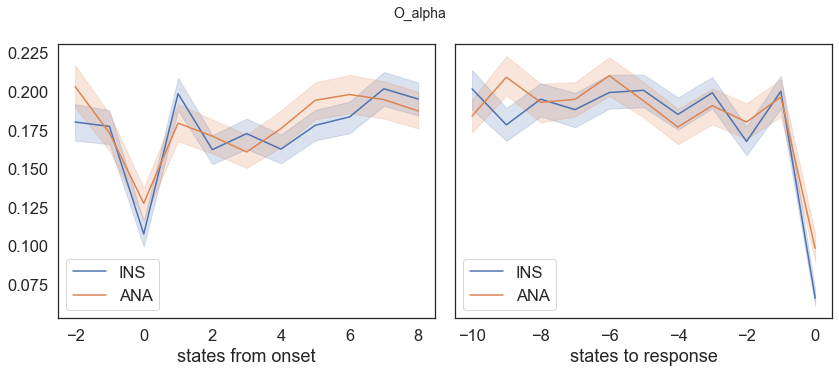

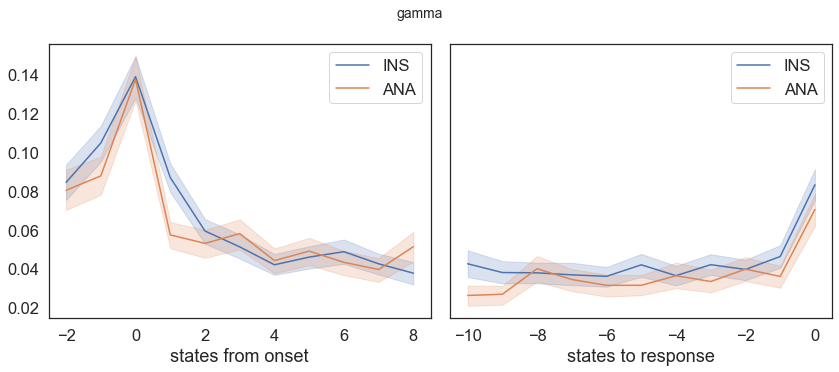

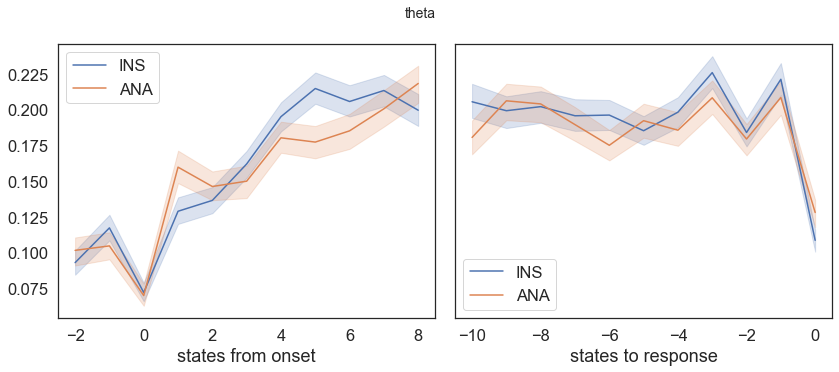

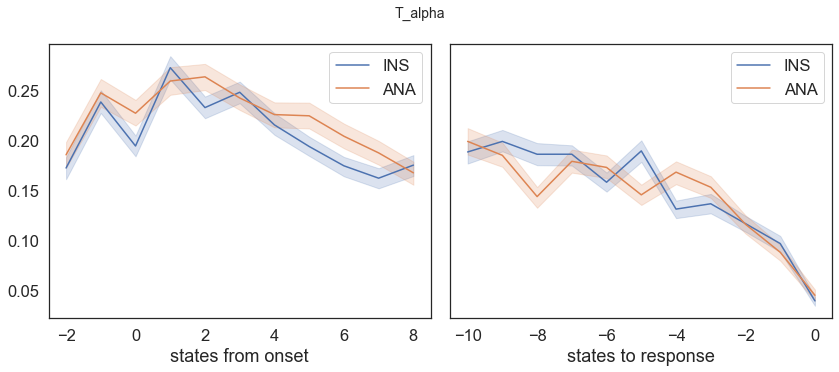

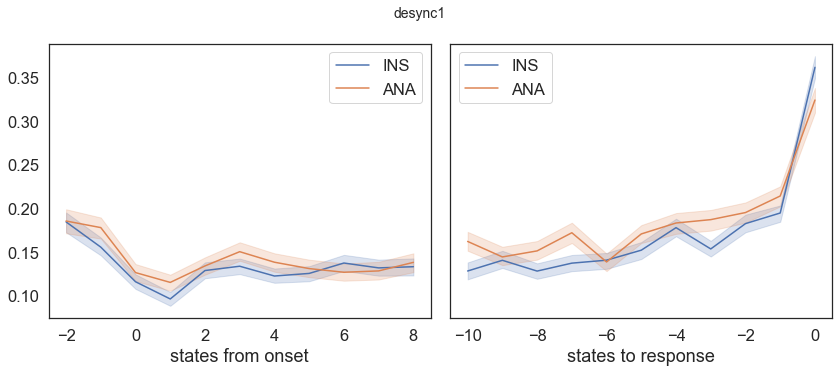

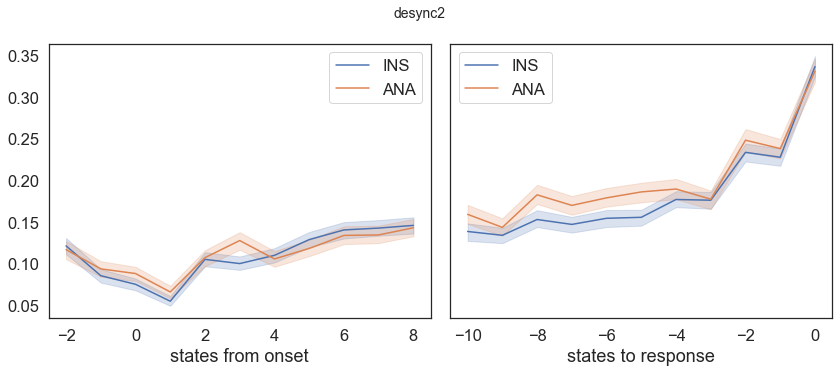

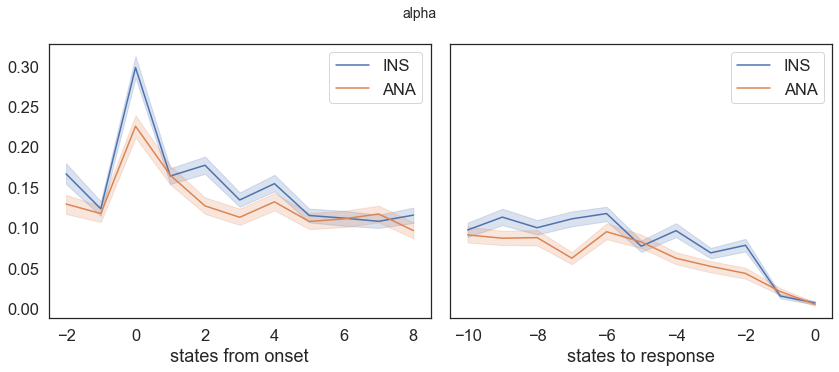

In [84]:
for i in range(nstate):
    fig,ax=plt.subplots(1,2,figsize=(12,5),sharey=True)
   
    for style in ['INS','ANA']:
        sns.lineplot(data=datadf[(datadf['sinceOnset']<=8)&(datadf['state2Last']<0)&(datadf['sinceOnset']>-3)].loc[style],
                     x="sinceOnset", y=i,ci=68,ax=ax[0])
    ax[0].legend(labels=['INS','ANA'])
    #ax[0].set_ylim(0.0,0.25)
    ax[0].set_xlabel('states from onset')
    ax[0].set_ylabel('')
    for style in ['INS','ANA']:
        sns.lineplot(data=datadf[(datadf['sinceOnset']>0)&(datadf['state2Last']>=-10)].loc[style],
                     x="state2Last", y=i,ci=68,ax=ax[1])
    ax[1].legend(labels=['INS','ANA'])
    #ax[1].set_title(statelabels[i]+' state probability')
    ax[1].set_xlabel('states to response')
    ax[1].set_ylabel('')
    #ax[1].set_ylim(0.0,0.25)
    plt.suptitle(statelabel[i],y=1.05,size=14)
    plt.tight_layout()

    plt.show()
    plt.close()


In [9]:
statelabels_reorder=[str(i) for i in range(1,14)]

# transition analysis

In [12]:
changerows=solvedall[~(solvedall['state']==solvedall['statelst'])]
changerows=changerows.dropna()
changerows=changerows[(changerows['to_Onset']>0)&((changerows['to_Last']<0))]
changerows['statelst']=changerows['statelst'].astype(int)
tmp=changerows.groupby(['state','statelst']).count()[1].unstack(level=0)
tmp.index=states
tmp.columns=states
print('transition into')
corr_data=tmp.divide(tmp.sum(axis=1),axis=0)
errorDF=np.sqrt((corr_data*(1-corr_data)).div(tmp.sum(axis=1),axis='columns'))
corr_data.columns=statelabel
corr_data.index=statelabel
errorDF.columns=statelabel
errorDF.index=statelabel
print(np.round(corr_data.loc[statelabels_reorder,statelabels_reorder],3))
print(np.round(errorDF.loc[statelabels_reorder,statelabels_reorder],3))

transition into
        1      2      3      4      5      6      7      8      9     10  \
1     NaN  0.085  0.099  0.031  0.046  0.062  0.113  0.095  0.016  0.143   
2   0.047    NaN  0.162  0.080  0.080  0.066  0.124  0.093  0.031  0.015   
3   0.050  0.175    NaN  0.062  0.088  0.056  0.137  0.133  0.010  0.051   
4   0.025  0.137  0.085    NaN  0.120  0.102  0.106  0.109  0.013  0.014   
5   0.042  0.173  0.222  0.123    NaN  0.226  0.038  0.089  0.021  0.001   
6   0.046  0.112  0.109  0.108  0.219    NaN  0.081  0.174  0.021  0.007   
7   0.050  0.109  0.106  0.050  0.021  0.045    NaN  0.124  0.013  0.118   
8   0.051  0.095  0.117  0.070  0.049  0.094  0.118    NaN  0.002  0.100   
9   0.061  0.197  0.069  0.041  0.062  0.084  0.068  0.013    NaN  0.001   
10  0.062  0.004  0.051  0.018  0.001  0.009  0.156  0.123  0.004    NaN   
11  0.039  0.100  0.042  0.112  0.007  0.051  0.179  0.138  0.009  0.175   
12  0.042  0.143  0.061  0.033  0.003  0.064  0.145  0.092  0.084  0.182

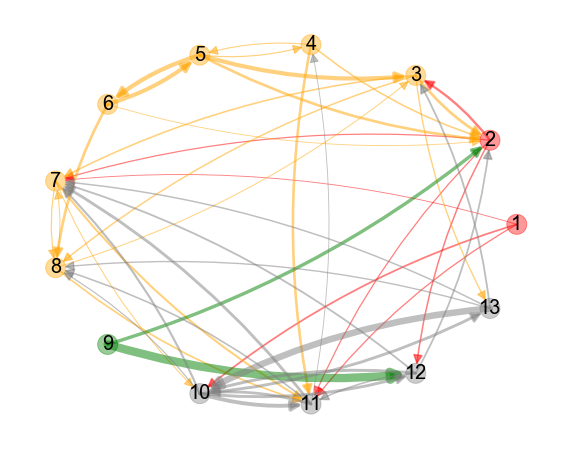

In [95]:
cmap={'1':'red','2':'red',
      '3':'orange','4':'orange','5':'orange','6':'orange', '7':'orange','8':'orange',
      '9':'green',
      '10':'gray','11':'gray','12':'gray','13':'gray'}


plt.figure(figsize=(10,8))
G = nx.DiGraph()
for i in range(nstate):
    G.add_node(str(i+1))
for i in [3,2,12,9,5,1,10,7,6,0,4,11,8]:

    for j in [3,2,12,9,5,1,10,7,6,0,4,11,8]:
        if i==j:continue
        
        w=corr_data.loc[statelabel[i],statelabel[j]]
        if w<.11:continue
        G.add_edge(statelabel[i],statelabel[j],weight=w*30-2.5)
colors=[cmap[e[0]] for e in G.edges]
pos = nx.circular_layout(G)
weight=nx.get_edge_attributes(G,'weight')
nx.draw_networkx_nodes(G, pos,node_color =cmap.values(),node_size = 400, alpha =.4)
nx.draw_networkx_labels(G,pos, font_size=20,font_color='black',fontweight="bold")
nx.draw_networkx_edges(G, pos, width=list(weight.values()), alpha=0.5, arrowsize=20,edge_color=colors,connectionstyle='arc3, rad = 0.1')
plt.axis('off')
plt.show()

In [13]:
changerows.reset_index(inplace=True)
tmp=changerows[changerows['style']=='INS'].groupby(['state','statelst']).count()[1].unstack(level=0)
tmp.index=states
tmp.columns=states
print('transition into')
corr_data=tmp.divide(tmp.sum(axis=1),axis=0)
errorDF=np.sqrt((corr_data*(1-corr_data)).div(tmp.sum(axis=1),axis='columns'))
corr_data.columns=statelabel
corr_data.index=statelabel
errorDF.columns=statelabel
errorDF.index=statelabel

corr_data_INS=corr_data
errorDF_INS=errorDF

tmp=changerows[changerows['style']=='ANA'].groupby(['state','statelst']).count()[1].unstack(level=0)
tmp.index=states
tmp.columns=states

corr_data=tmp.divide(tmp.sum(axis=1),axis=0)
errorDF=np.sqrt((corr_data*(1-corr_data)).div(tmp.sum(axis=1),axis='columns'))
corr_data.columns=statelabel
corr_data.index=statelabel
errorDF.columns=statelabel
errorDF.index=statelabel

corr_data_ANA=corr_data
errorDF_ANA=errorDF

np.round(((corr_data_INS-corr_data_ANA)/np.sqrt(errorDF_INS**2+errorDF_ANA**2)).loc[statelabels_reorder,statelabels_reorder],3)


transition into


,1,2,3,4,5,6,7,8,9,10,11,12,13
1,NaN,0.055,-0.271,-0.116,0.577,-2.115,0.342,1.105,1.037,0.025,-0.307,-1.386,1.055
2,-0.801,NaN,2.257,0.736,0.804,-1.167,-0.495,-0.825,0.121,-0.741,-0.622,0.045,-0.591
3,0.477,0.436,NaN,-0.861,1.655,0.470,-2.950,-1.706,0.180,0.423,-0.264,1.601,0.604
4,-1.081,-0.611,0.408,NaN,0.939,1.909,-0.701,-1.021,-0.123,0.563,-0.981,-0.903,0.845
5,-1.268,-1.889,3.237,-0.685,NaN,0.486,0.635,-0.389,0.107,-0.985,0.173,-1.124,-0.437
6,0.710,-3.191,3.202,-1.141,3.241,NaN,-1.595,-1.762,0.997,-0.516,-2.086,-1.531,0.579
7,-0.671,-1.787,-0.147,0.262,0.384,-1.382,NaN,-0.350,0.025,1.434,0.694,1.493,-0.432
8,-0.527,-0.814,-0.251,1.490,0.315,-0.931,1.061,NaN,0.711,0.171,-0.601,-1.008,0.873
9,3.098,-0.500,-0.679,1.256,4.954,2.515,-3.679,1.168,NaN,NaN,-3.338,-2.395,-5.271
10,-0.222,-0.860,1.629,2.303,1.097,-0.135,-2.049,-1.216,0.274,NaN,0.387,0.420,0.195


In [14]:
solvedall.reset_index(inplace=True)

In [98]:
tmp=solvedall[(solvedall['to_Last']<0)&(solvedall['to_Onset']>0)]
tmp=tmp.groupby('id').last()[['to_Onset','style']]
print(tmp.groupby('style').mean())
print(tmp.groupby('style').count())
print(tmp.groupby('style').std()/np.sqrt(tmp.groupby('style').count()))

       to_Onset
style          
ANA    6.650000
INS    5.821058
       to_Onset
style          
ANA         685
INS         907
       to_Onset
style          
ANA    0.108792
INS    0.101623


In [110]:
#resample to match RT
exclude_INS=tmp[(tmp['style']=='INS')&(tmp['to_Onset']<4.8)].sample(n=110).index

exclude_INS=exclude_INS.union(tmp[(tmp['style']=='INS')&(tmp['to_Onset']<6)].sample(n=160).index)
tmp=solvedall[(solvedall['to_Last']<0)&(solvedall['to_Onset']>0)&(~(solvedall['id'].isin(exclude_INS)))]
tmp=tmp.groupby('id').last()[['to_Onset','style']]
print(tmp.groupby('style').mean())
print(tmp.groupby('style').count())


       to_Onset
style          
ANA    6.650000
INS    6.504035
       to_Onset
style          
ANA         685
INS         694


In [ ]:
#using all trials
exclude_INS=[]

In [111]:
tmp=solvedall[(solvedall['to_Last']<0)&(solvedall['to_Onset']>0)&(~(solvedall['id'].isin(exclude_INS)))]
tmp=tmp.groupby('id').mean().merge(tmp.groupby('id').first()[['style']],left_index=True,right_index=True)

occupancy_mean=pd.DataFrame({'INS':tmp[tmp['style']=='INS'][states].mean().values,
              'ANA':tmp[tmp['style']=='ANA'][states].mean().values,'label':statelabel}).set_index('label')
occupancy_err=pd.DataFrame({'INS':
                            (tmp[tmp['style']=='INS'][states].std()/np.sqrt(len(tmp[tmp['style']=='INS']))).values,
              'ANA':(tmp[tmp['style']=='ANA'][states].std()/np.sqrt(len(tmp[tmp['style']=='INS']))).values,'label':statelabel}).set_index('label')
cnt=tmp.groupby('style').count()['n']
cnt

style
ANA    685
INS    694
Name: n, dtype: int64

In [17]:
statelabels_reorder=statelabel

/Users/yyu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


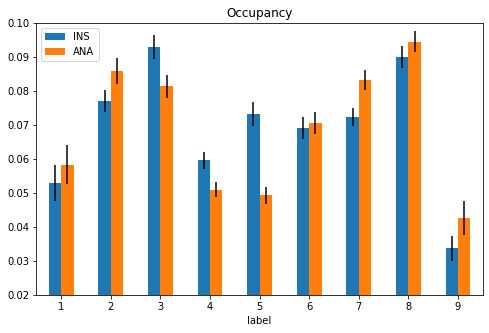

In [112]:
statelabels_reorder=[3,2,12,9,5,1,10,7,6]
fig,ax=plt.subplots(1,figsize=(8,5))
occupancy_mean.ix[statelabels_reorder][['INS','ANA']].plot(kind='bar',rot=True,yerr=occupancy_err.ix[statelabels_reorder][['INS','ANA']].T.values,
                                                            ylim=(.02,.1),title='Occupancy',ax=ax)
ax.set_xticklabels(range(1,10))

plt.show()
plt.close()

In [113]:
allvisitlen=pd.DataFrame()
allvisitlen_sd=pd.DataFrame()
stepsize=0.05
for style in ['INS','ANA']:
#for style in ['INS']:
    tmp=solvedall[(solvedall['to_Last']<0)&(solvedall['to_Onset']>0)&(solvedall['style']==style)&(~(solvedall['id'].isin(exclude_INS)))]
    exclude=[]
    if style=='TO':
        tmp=tmp[tmp['to_Onset']<6]
    else:
        if style=='ANA':
            exclude=[]
        else:
            exclude=[]
    statecnt=tmp[~tmp['id'].isin(exclude)].groupby(['state','chgflag']).count()[1]
    statecnt=stepsize*statecnt.unstack(level=1)
    visitlen=pd.DataFrame(dict([(statelabel[i],pd.Series(statecnt.loc[i].dropna().values)) for i in range(nstate)]))
    allvisitlen.loc[:,style]=visitlen.mean()
    allvisitlen_sd.loc[:,style]=visitlen.describe().loc['std']/np.sqrt(visitlen.describe().loc['count'])


/Users/yyu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


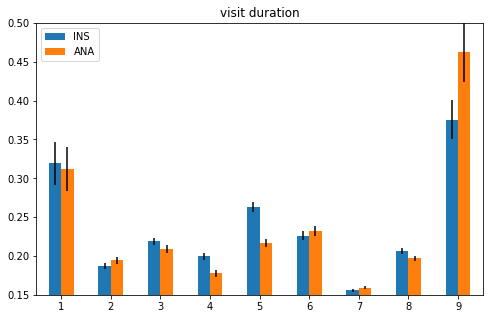

In [114]:
statelabels_reorder=[3,2,12,9,5,1,10,7,6]
fig,ax=plt.subplots(1,figsize=(8,5))
allvisitlen.ix[statelabels_reorder][['INS','ANA']].plot(kind='bar',rot=True,yerr=allvisitlen_sd.ix[statelabels_reorder][['INS','ANA']].T.values,ylim=(.15,.5),title='visit duration',ax=ax)
ax.set_xticklabels(range(1,10))
plt.show()
plt.close()

In [115]:
tmp=solvedall[(solvedall['to_Last']<0)&(solvedall['to_Onset']>0)&(~(solvedall['id'].isin(exclude_INS)))]

statecnt=tmp.groupby(['state','chgflag']).count()[1]

labels=tmp.groupby(['state','chgflag']).last()[['style','id']]
maxLength=tmp.groupby(['style','id']).last()['to_Onset']
visitfreq=pd.concat([statecnt,labels],axis=1)
visitfreq.rename(columns={1:'dur'},inplace=True)

In [116]:
visitfreq=visitfreq.reset_index().groupby(['state','style','id']).count()['dur']
visitfreq=visitfreq.reset_index(level=0).merge(pd.DataFrame(maxLength),how='outer',left_on=['style','id'],right_on=['style','id'])
visitfreq['freq']=visitfreq['dur']/visitfreq['to_Onset']

In [117]:
visitfreq=visitfreq.reset_index().groupby(['style','state','id']).mean()['freq']

In [118]:
allvisitfreq=pd.DataFrame({'INS':visitfreq['INS'].groupby(level=0).mean(),
                           'ANA':visitfreq['ANA'].groupby(level=0).mean()}).rename(index=dict([(i,statelabel[i]) for i in range(nstate)]))
allvisitfreq.index=allvisitfreq.index.astype(int)

In [119]:
ntrial=len(visitfreq['INS'][0])
allvisitfreq_sd=pd.DataFrame({'INS':visitfreq['INS'].groupby(level=0).std()/np.sqrt(ntrial),
                           'ANA':visitfreq['ANA'].groupby(level=0).std()/np.sqrt(ntrial)}).rename(index=dict([(i,statelabel[i]) for i in range(nstate)]))
allvisitfreq_sd.index=allvisitfreq_sd.index.astype(int)

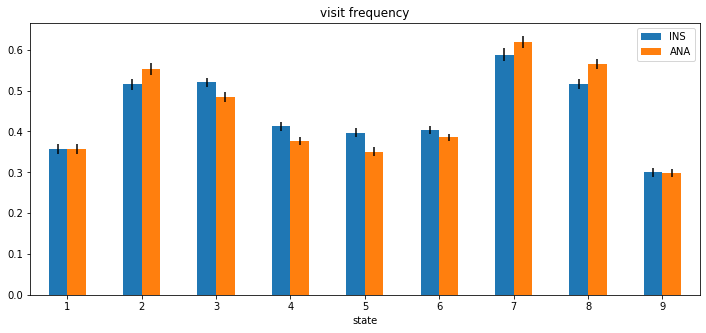

In [120]:
fig,ax=plt.subplots(1,figsize=(12,5))
allvisitfreq[['INS','ANA']].loc[range(1,10)].plot(kind='bar',rot=True,yerr=allvisitfreq_sd[['INS','ANA']].loc[range(1,10)].T.values,title='visit frequency',ax=ax)
plt.show()
plt.close()

In [88]:
tmp=np.round((allvisitlen['INS']-allvisitlen['ANA'])/np.sqrt((allvisitlen_sd['INS']**2+allvisitlen_sd['ANA']**2)),3)
tmp.index=tmp.index.astype(int)
tmp=tmp.loc[range(1,14)]
tmp2=np.round((allvisitfreq['INS']-allvisitfreq['ANA'])/np.sqrt((allvisitfreq_sd['INS']**2+allvisitfreq_sd['ANA']**2)),3).loc[range(1,14)]
tmp3=np.round((occupancy_mean['INS']-occupancy_mean['ANA'])/np.sqrt((occupancy_err['INS']**2+occupancy_err['ANA']**2)),3)
tmp3.index=tmp3.index.astype(int)
tmp3=tmp3.loc[range(1,14)]
display(HTML(np.round(pd.DataFrame({'duration:INS-ANA':tmp,
                                    'frequency:INS-ANA':tmp2,
                                   'occupancy:INS-ANA':tmp3
                                   }).reset_index().rename(columns={'label':'state'}),3).to_html(index=False)))


index,duration:INS-ANA,frequency:INS-ANA,occupancy:INS-ANA
1,-0.105,2.322,-1.053
2,-1.446,-0.990,-2.004
3,1.963,3.338,2.790
4,3.131,3.883,2.193
5,5.514,4.830,6.261
6,-0.426,3.048,0.020
7,-1.157,-1.493,-4.023
8,2.069,-1.992,-1.183
9,-1.321,2.720,-0.385
10,0.334,0.764,-0.053


In [121]:
#resampled
tmp=np.round((allvisitlen['INS']-allvisitlen['ANA'])/np.sqrt((allvisitlen_sd['INS']**2+allvisitlen_sd['ANA']**2)),3)
tmp.index=tmp.index.astype(int)
tmp=tmp.loc[range(1,14)]
tmp2=np.round((allvisitfreq['INS']-allvisitfreq['ANA'])/np.sqrt((allvisitfreq_sd['INS']**2+allvisitfreq_sd['ANA']**2)),3).loc[range(1,14)]
tmp3=np.round((occupancy_mean['INS']-occupancy_mean['ANA'])/np.sqrt((occupancy_err['INS']**2+occupancy_err['ANA']**2)),3)
tmp3.index=tmp3.index.astype(int)
tmp3=tmp3.loc[range(1,14)]
display(HTML(np.round(pd.DataFrame({'duration:INS-ANA':tmp,
                                    'frequency:INS-ANA':tmp2,
                                   'occupancy:INS-ANA':tmp3
                                   }).reset_index().rename(columns={'label':'state'}),3).to_html(index=False)))

index,duration:INS-ANA,frequency:INS-ANA,occupancy:INS-ANA
1,0.189,-0.035,-0.700
2,-1.256,-1.903,-1.778
3,1.559,2.228,2.328
4,3.690,2.472,2.494
5,5.766,3.100,5.501
6,-0.678,1.274,-0.331
7,-1.148,-1.395,-2.833
8,1.888,-2.709,-1.010
9,-1.891,0.053,-1.419
10,0.153,0.464,0.378


In [ ]:
statelabel=['10','6','2','1','11','5','9','8','13','4','7','12','3']

In [34]:
allstate.reset_index(inplace=True)

In [35]:
stepsize=0.05
onsetms=0
allstate['statelst']=allstate['state'].shift(1)
allstate['change']=~(allstate['state']==allstate['statelst'])
allstate['chgflag']=(~(allstate['change']==0)).astype(int)
allstate['chgflag']=allstate['chgflag'].cumsum()